In [1]:
import pandas as pd
import numpy as np
# This is just so that we don't get annoying warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [59]:
df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\04_Data_Visualisation\lab-customer-analysis-round-3\files_for_lab\csv_files\marketing_customer_analysis.csv')

In [60]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [61]:
# Organising df:

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [62]:
# 1. Show and describe dataframe

data_types = df.dtypes
print (data_types)

def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col


numeric_columns, categorical_columns = column_types(df)
print ('numerical colums: ', numeric_columns)
print ('categorical colums: ', categorical_columns)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object
nu

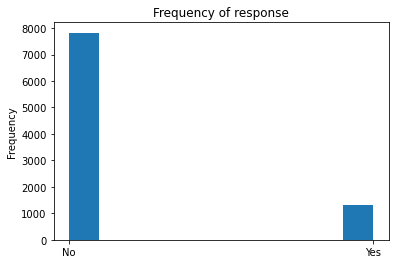

'\nThe alternative code:\n    sns.histplot(df[\'response\'])\n    plt.ylabel(\'Frequency\')\n    plt.title(\'Frequency of response\')\n    plt.show()\n\ndoes not work in my environment (for some reason); always get the error:\n OptionError: "No such keys(s): \'mode.use_inf_as_null\'"\n\n'

In [63]:
# 2. "Show a plot with the total number of responses"

# Histplot or barplot can be used here; I'm going with the bar plot, as this one is more suitable for general visualisations

plt.hist(df['response'])
plt.ylabel('Frequency')
plt.title('Frequency of response')

plt.show()

'''
The alternative code:
    sns.histplot(df['response'])
    plt.ylabel('Frequency')
    plt.title('Frequency of response')
    plt.show()

does not work in my environment (for some reason); always get the error:
 OptionError: "No such keys(s): 'mode.use_inf_as_null'"

'''


In [64]:
# 3. "Show a plot of the response rate by the sales channel.""

values_sales = df['sales_channel'].unique()
print (values_sales)
                  
values_response = df['response'].unique()
print (values_response)

# Here I need a new df with the percentage of people who said "yes" in the sales channel x
# 1. Calculating the response rate for each sales channel:
# create a colum with 0 and 1 and another column deviding count 1 or 0  /total number of counted cells *100 = %



['Agent' 'Call Center' 'Web' 'Branch']
['No' 'Yes']


In [65]:
df['response_2'] = np.where(df['response'] =='Yes',1 ,0)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,response_2
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [66]:
# Now I want to calculate the response rate based on the sum of the counted 'Yes'/1 in the last column

df['response_rate'] = df['response_2'] / len(df)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,response_2,response_rate
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0.000000
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0.000000
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0.000000
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,0.000000
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,0.000000
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0.000109
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,0.000000
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,0.000000


In [67]:
# now I can make a new table with the mean for each sales channel
response_rate = df.groupby('sales_channel')['response_2'].mean().reset_index(name='response_rate')
response_rate['response_rate'] *= 100
response_rate

,sales_channel,response_rate
0,Agent,19.154443
1,Branch,11.453058
2,Call Center,10.878187
3,Web,11.773585


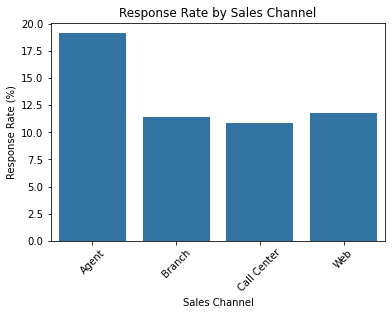

In [68]:
# and now I just need to plot it

sns.barplot(data=response_rate, x='sales_channel', y='response_rate')
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45) 
plt.show()

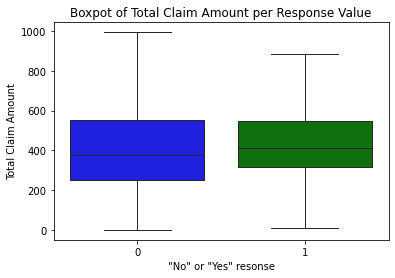

In [99]:
# 4. "Show a plot of the response rate by the total claim amount"

col = {'0': 'blue', '1': 'green'}

sns.boxplot(data = df, x = 'response_2', y = 'total_claim_amount', palette=col, showfliers=False,)
plt.title('Boxpot of Total Claim Amount per Response Value')
plt.xlabel('"No" or "Yes" resonse')
plt.ylabel('Total Claim Amount')
plt.show()

In [100]:
# 5. Show a plot of the response rate by income

# first get rid of 0 values, and put NaN instead

df['income'].replace(0, np.nan, inplace=True)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,response_2,response_rate
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0.000000
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,NaN,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0.000000
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0.000000
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,NaN,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,0.000000
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836.0,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941.0,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,0.000000
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604.0,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0.000109
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,NaN,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,0.000000
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941.0,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,0.000000


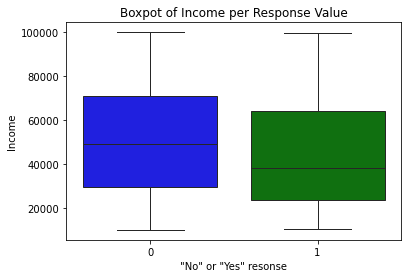

In [102]:
# Then create plot:

col = {'0': 'blue', '1': 'green'}

sns.boxplot(data = df, x = 'response_2', y = 'income', palette=col, showfliers=False,)
plt.title('Boxpot of Income per Response Value')
plt.xlabel('"No" or "Yes" resonse')
plt.ylabel('Income')
plt.show()